### Algorithm:

 1. **Initialize** $\theta$ (somehow$^{[4]}$)
  
   * where $\theta \equiv \{ W^{(1)}, b^{(1)}, \dots, W^{(L+1)}, b^{(L+1)}\}$
     
     with $(1), \dots, (L+1)$ the number of each layer
     
     > TODO: maybe some NN diagram here?

 2. for **N iterations**
  
  > for ***each* training example** $(x^{(t)}, y^{(t)})$ 
  >  
  > >`#  Get grad of loss wrt parameters and regularization term`
  > >
  > > * $\Delta = -\nabla_\theta \ l \left(f(x^{(t)}; \theta), y^{(t)}\right) - \lambda \nabla_\theta \ \Omega(\theta)$
  >  
  > > `# Take a small step in the direction that minimizes the loss`
  > * $\theta \leftarrow \theta + \alpha \Delta$
  >  
  >  where
  >  
  >  * $l(\hat y^{(t)} , y^{(t)})$ is the loss function for training example $t$
  >  
  >  * $\Omega(\theta)$ is the regularizer function

### We need to get

1. **Loss function** $$l \left(f(x^{(t)}; \theta), y^{(t)}\right)$$

2. A procedure for the **parameter gradients** $$\nabla_\theta \ l \left(f(x^{(t)}; \theta), y^{(t)}\right)$$

3. The **regularizer** $$\Omega(\theta)$$
  
  and its **gradient** $$\nabla_\theta \ \Omega(\theta)$$

4. $^{[4]}$ An **initialization method**

# Loss function (for classification)

The Neural network estimates:

> $$f(\mathbf x)_c = p(y=c | \mathbf x)$$

Read as 

> "Probability of **output** $y$ corresponding to class $c$, given **input** data $\mathbf x$"

We want to **maximize** the **probability of the correct labels**.

For that, we use maximum likeligood, in particular, we minimize the negative log-likelihood

> max p(y|x)





## Parameter Gradients

### Loss gradient at output
### Loss gradient at output pre-activation

### Loss gradient at hidden layer

### Loss gradient at output

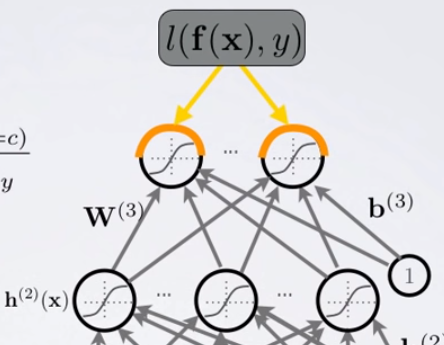

* **Partial derivative** w.r.t. each $f(\mathbf x)_c$

>$$\frac \partial {\partial f(\mathbf x)_c} -log f(\mathbf x)_y = \frac {- \mathbf 1_{(y=c)}}{f(\mathbf x)_y}$$
>
> with
> 
> * $\mathbf x$: Training data
>
> * $f(\mathbf x)_c = P(y=c \ | \ \mathbf x \ ; \theta)$


* **Gradient** (matrix of partial derivatives w.r.t **all** output units)

>$$\nabla _{f(\mathbf x)} - log f(\mathbf x)_y =$$
>
>$$= \frac {-1}{f(\mathbf x)_y} \
\left[\begin{matrix}
\mathbf 1_{(y=0)} \\
\mathbf 1_{(y=1)} \\
\vdots \\
\mathbf 1_{(y=C-1)} \\
\end{matrix}\right]
$$
>  
>  
>$$= \frac {-\mathbf e(y)}{f(\mathbf x)_y}$$
>
> with
> 
> * $\mathbf e(y)$: ***one hot vector*** with $1$ at position $y$



### 2: Loss gradient at output pre-activation

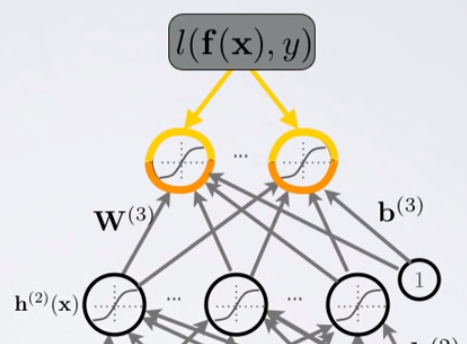

* **Partial derivative** w.r.t. each pre-activation $a^{(L+1)}(\mathbf x)_c$ at the output layer $(L+1)$

>$$\frac \partial {\partial a^{(L+1)}(\mathbf x)_c} -log f(\mathbf x)_y = - \left( \mathbf 1_{(y=c)} - f(\mathbf x)_c \right)$$
>
> Derivation below ***Gradient***.


* **Gradient** (matrix of partial derivatives w.r.t **all** output pre-activations)

>$$\nabla _{a^{(L+1)}(\mathbf x)} - log \ f(\mathbf x)_y =$$
>
>$$= \left[\begin{matrix}
\mathbf 1_{(y=0)} \\
\mathbf 1_{(y=1)} \\
\vdots \\
\mathbf 1_{(y=C-1)} \\
\end{matrix}\right] \ - \
\
\left[\begin{matrix}
f(\mathbf x)_{c=0} \\
f(\mathbf x)_{c=1} \\
\vdots \\
f(\mathbf x)_{c=C-1} \\
\end{matrix}\right]
$$
>  
>  
>$$= -\left( \ \mathbf e(y) - \mathbf f(\mathbf x) \ \right) $$
>
> with
> 
> * $\mathbf e(y)$: ***one hot vector*** with $1$ at position $y$
>
> * $\mathbf f(\mathbf x)$: vector of probabilities for each class $c$


### Derivation

$$\frac \partial {\partial a^{(L+1)}(\mathbf x)_c} -log f(\mathbf x)_y =$$

Take derivative of $-log$ and **chain rule**

$$= \frac {-1}{f(\mathbf x)_y} \frac \partial {\partial a^{(L+1)}(\mathbf x)_c} f(\mathbf x)_y$$

Because each $f(\mathbf x)_y$ corresponds to a **softmax function**

$$= \frac {-1}{f(\mathbf x)_y} \frac \partial {\partial a^{(L+1)}(\mathbf x)_c} \ \text{softmax}(\mathbf a^{(L+1)}(\mathbf x))_y$$

with
* $\mathbf a^{(L+1)}(\mathbf x)$: **pre-activation vector** of rows $a^{(L+1)}(\mathbf x)_c$ for each class $c$.

Applying **definition of softmax**

$$= \frac {-1}{f(\mathbf x)_y} \frac \partial {\partial a^{(L+1)}(\mathbf x)_c} \ \frac {\exp(a^{(L+1)}(\mathbf x)_y)}{\sum_{c^\prime} \exp(a^{(L+1)}(\mathbf x)_{c^\prime})}$$

Now we have the partial derivative of a ratio of functions, so we can use the ***quotient rule***:

> General case:
> $$\left(\frac {g(x)}{h(x)} \right)^\prime = \frac {g^\prime . h - g . h^\prime}{h^2}$$
>
> $$ = g^\prime \frac {1} {h} - \frac {g}{h^2} h^\prime$$

> Partial derivative:
> $$\frac {\partial \frac {g(x)}{h(x)}}{\partial x} = \frac {\partial g(x)}{\partial x}\frac {1}{h(x)} - \frac {g(x)}{h(x)^2}\frac {\partial h(x)}{\partial x}$$

we had:

$$= \frac {-1}{f(\mathbf x)_y} \frac \partial {\partial a^{(L+1)}(\mathbf x)_c} \ \frac {\exp(a^{(L+1)}(\mathbf x)_y)}{\sum_{c^\prime} \exp(a^{(L+1)}(\mathbf x)_{c^\prime})}$$

replacing using the quotient rule:
$$= \frac {-1}{f(\mathbf x)_y}  \left( \frac {\partial g(x)}{\partial x}\frac {1}{h(x)} - \frac {g(x)}{h(x)^2}\frac {\partial h(x)}{\partial x} \right)$$

where:

> $g(x) = \exp \left(a^{(L+1)}(\mathbf x)_y \right)$
>
> $h(x) = \sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)$
>
> $x = a^{(L+1)}(\mathbf x)_y$

$$= \frac {-1}{f(\mathbf x)_y}  \left( \frac {\partial g(x)}{\partial a^{(L+1)}(\mathbf x)_c}\frac {1}{h(x)} - \frac {g(x)}{h(x)^2}\frac {\partial h(x)}{\partial a^{(L+1)}(\mathbf x)_c} \right)$$


$$= \frac {-1}{f(\mathbf x)_y}  \left( \frac{\frac {\partial }{\partial a^{(L+1)}(\mathbf x)_c} \exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)} -\
\frac {\exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\left(\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right) \right)^2}\frac {\partial }{\partial a^{(L+1)}(\mathbf x)_c} \sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right) \right)$$


We can calculate easily the two partial derivatives:

* $\frac {\partial }{\partial a^{(L+1)}(\mathbf x)_c} \exp \left(a^{(L+1)}(\mathbf x)_y \right) = \mathbf 1_{(y=c)} \exp \left(a^{(L+1)}(\mathbf x)_y \right)$

* $\frac {\partial }{\partial a^{(L+1)}(\mathbf x)_c} \sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right) = \exp \left(a^{(L+1)}(\mathbf x)_{c}\right)$

And now we have:

$$= \frac {-1}{f(\mathbf x)_y}  \left( \frac{\mathbf 1_{(y=c)} \exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)} -\
\frac {\exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\left(\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right) \right)^2} \exp \left(a^{(L+1)}(\mathbf x)_{c}\right) \right)$$

**Separating** the squared denominator:
$$= \frac {-1}{f(\mathbf x)_y}  \left( \frac{\mathbf 1_{(y=c)} \exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)} -\
\frac {\exp \left(a^{(L+1)}(\mathbf x)_y \right)}{\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)} \frac {\exp \left(a^{(L+1)}(\mathbf x)_{c}\right)}{\sum_{c^\prime} \exp \left(a^{(L+1)}(\mathbf x)_{c^\prime}\right)} \right)$$

Realize that we have three **softmax expressions**:

$$= \frac {-1}{f(\mathbf x)_y}  \left(\mathbf 1_{(y=c)} \text{softmax} \left(\mathbf a^{(L+1)}(\mathbf x) \right)_y - \text{softmax} \left(\mathbf a^{(L+1)}(\mathbf x) \right)_y \text{softmax} \left(\mathbf a^{(L+1)}(\mathbf x) \right)_c \right)$$

As before, **softmax of the pre-activations** is the **activations of the output layer**

$$=  \frac {-1}{f(\mathbf x)_y}  \left( \mathbf 1_{(y=c)} f(\mathbf x)_y - f(\mathbf x)_y f(\mathbf x)_c \right)$$

Simplifying:

$$=  - \left( \mathbf 1_{(y=c)} - f(\mathbf x)_c \right)$$




| finally, we can conclude:|
|-|
|$$\huge \frac \partial {\partial a^{(L+1)}(\mathbf x)_c} -log \ f(\mathbf x)_y =  - \left( \mathbf 1_{(y=c)} - f(\mathbf x)_c \right)$$|

# Loss gradient at hidden layer

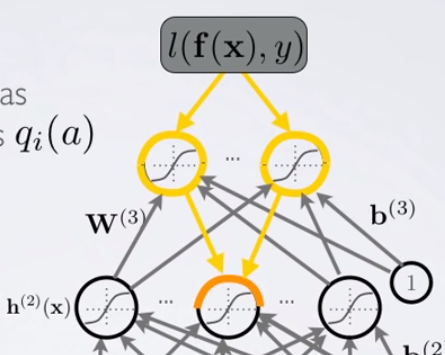

Obtaining the expression as before **for each unit in the hidden layer** seems to be too much work, and more yet for later layers.

We need a more general formulation.

### Using the chain rule

> if a **function** $p(a)$ can be written as a function of **intermediate results** $q_i(a)$, then we have:
>
> $$\frac {\partial p(a)}{\partial a} = \sum_i \frac {\partial p(a)}{\partial q_i(a)}\frac {\partial q_i(a) }{\partial a}$$
>
> with
>
> * $q_i(a)$ being the $i^{th}$ **intermediate result** of $p(a)$
>
> * "***intermediate result***" as in a **composition of functions**
 

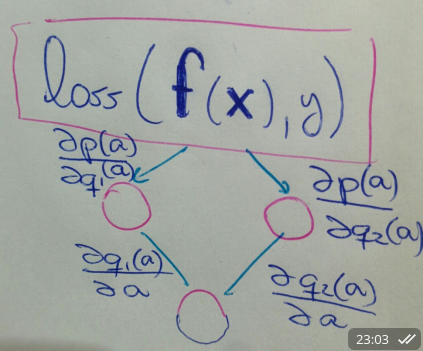

To invoque the chain rule, we can set:

* $a$ to an **activation** of a unit in **some layer**

* $q_i(a)$ to a **pre-activation** in the **layer above**

* $p(a)$ is the **loss function**

Now we can finally form an **expression for the loss gradient for each entire hidden layer**

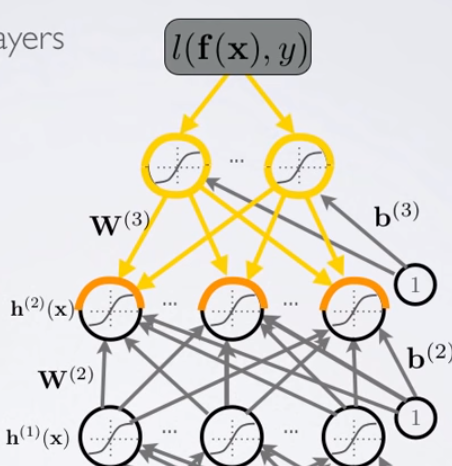

### Partial derivative of loss w.r.t. $j^{th}$ hidden unit of $k^{th}$ hidden layer  

$$\frac {\partial}{\partial h^{(k)}(\mathbf x)_j} -log \ f(\mathbf x)_y =$$

* $h^{(k)}(\mathbf x)_j \equiv j^{th}$ hidden unit of the $k^{th}$ hidden layer

Using the chain rule:

$$= \sum_i \frac {\partial -log \ f(\mathbf x)_y}{\partial a^{(k+1)}(\mathbf x)_i} \frac {\partial a^{(k+1)}(\mathbf x)_i}{\partial h^{(k)}(\mathbf x)_j}$$

* Sum over all $i$ hidden units **on the layer above**

|Chain rule|
|-|
|$$\large \frac {\partial}{\partial h^{(k)}(\mathbf x)_j} -log \ f(\mathbf x)_y = \sum_i \frac {\partial -log \ f(\mathbf x)_y}{\partial a^{(k+1)}(\mathbf x)_i} \frac {\partial a^{(k+1)}(\mathbf x)_i}{\partial h^{(k)}(\mathbf x)_j}$$|

Lets compute the **second term** first

### Partial derivative wrt **hidden layer**

$$\frac {\partial }{\partial h^{(k)}(\mathbf x)_j} a^{(k+1)}(\mathbf x)_i$$

#### Reminder of activation function:

> $$a^{(k)} (\mathbf x)_i = b_i^{(k)} + \sum_{j^\prime} \mathbf W_{i,{j^\prime}}^{(k)} h^{(k-1)}(\mathbf x)_{j^\prime}$$
>
> * **Linear combination** of all activations of the units in the **layer below**
>
> $$a^{(k+1)} (\mathbf x)_i = b_i^{(k+1)} + \sum_{j^\prime} \mathbf W_{i,{j^\prime}}^{(k+1)} h^{(k)}(\mathbf x)_{j^\prime}$$

Because we **take partial derivative w.r.t. specific hidden unit** $j$, all other values of $\mathbf W_{i,{j^\prime}}^{(k+1)}$ with ${j^\prime} \neq j$ will become zero:
$$\frac {\partial a^{(k+1)}(\mathbf x)_i}{\partial h^{(k)}(\mathbf x)_j} = \mathbf W_{i,j}^{(k+1)}$$

where 

* $\mathbf W_{i,j}^{(k+1)}$ represents the **connection** of the $j^{(th)}$ **neuron** in the **hidden layer** $k$ with the $i^{(th)}$ **neuron** in the **hidden layer above** $(k+1)$

$$= \sum_i \frac {\partial -log \ f(\mathbf x)_y}{\partial a^{(k+1)}(\mathbf x)_i} \ \mathbf W_{i,j}^{(k+1)}$$

Because we're summing over **row index** $i$, we can rewrite this in an equivalent **vector product form**

 $$= \left(\mathbf W_{. \ , \ j}^{(k+1)} \right)^\top \left(\nabla \mathbf a^{(k+1)}(\mathbf x) - log \ f(\mathbf x)_y \right)$$

 with
 * $\mathbf W_{. \ , \ j}^{(k+1)}$ as all row elements of the $j^{th}$ column

 |Partial derivative|
 |-|
 |$$\large \frac {\partial}{\partial h^{(k)}(\mathbf x)_j} -log \ f(\mathbf x)_y = \left(\mathbf W_{. \ , \ j}^{(k+1)} \right)^\top \left(\nabla _{\mathbf a^{(k+1)}(\mathbf x)} - log \ f(\mathbf x)_y \right)$$|

* Gradient (of all loss partial derivatives)

$$\nabla_{\mathbf h^{(k)}(\mathbf x)} - log \ f(\mathbf x)_y =$$

where:

* $\mathbf h^{(k)}(\mathbf x)$ is the vector of **all activations** $h^{(k)}(\mathbf x)_j$ in hidden layer $k$

We get the same expression as before, with all columns for $\mathbf W^{(k+1)}$ instead of only the $j^{th}$ column $W^{(k+1)}_{. \ , \ j}$, so we end up with a vector of the partial derivatives 

 |Gradient|
 |-|
 |$$\huge \nabla_{\mathbf h^{(k)}(\mathbf x)} - log \ f(\mathbf x)_y = \left(\mathbf W^{(k+1)} \right)^\top \left(\nabla_{\mathbf a^{(k+1)}(\mathbf x)} - log \ f(\mathbf x)_y \right)$$|

Now lets compute the first term from before:

### Partial derivative wrt **pre-activation**

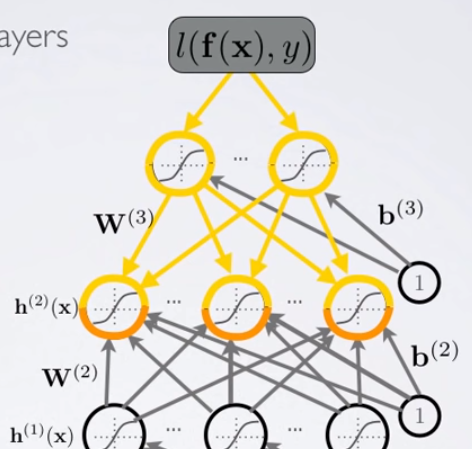


$$\frac {\partial }{\partial a^{(k)}(\mathbf x)_i} -log \ f(\mathbf x)_y = $$

using the chain rule again:

> $$= \frac {\partial -log \ f(\mathbf x)_y}{\partial h^{(k)}(\mathbf x)_j} \frac {\partial h^{(k)}(\mathbf x)_j}{\partial a^{(k)}(\mathbf x)_j}$$

I don't have a sum over $i$ as before, because each $j^{th}$ **activation** on layer $k$ does only depends on the $j^{th}$ **pre-activation** on the **same layer**

* $h^{(k)}(\mathbf x)_j = g\left(a^{(k)}(\mathbf x)_j \right)$

with $g$ an ***activation function*** / non-linear function (*sigmoid, relu, etc.*)

Taking the partial derivarive of $h^{(k)}(\mathbf x)_j$ wrt $a^{(k)}(\mathbf x)_j$, is simply the **partial derivative of the activation function** evaluated at the value of the pre-activation:

>$$= \frac {\partial -log \ f(\mathbf x)_y}{\partial h^{(k)}(\mathbf x)_j} \ g^\prime \left(a^{(k)}(\mathbf x)_j \right)$$

 |Partial derivative|
 |-|
 |$$\large \frac {\partial }{\partial a^{(k)}(\mathbf x)_i} -log \ f(\mathbf x)_y = \frac {\partial -log \ f(\mathbf x)_y}{\partial h^{(k)}(\mathbf x)_j} \ g^\prime \left(a^{(k)}(\mathbf x)_j \right)$$|

### Gradient

Take all partial derivatives and put them in a vector

$$\nabla_{\mathbf a^{(k)}(\mathbf x)} - \log f(\mathbf x)_y =$$

Vector version of chain rule:
$$=\left( \nabla_{\mathbf h^{(k)}(\mathbf x)} - \log f(\mathbf x)_y\right)^\top \nabla_{\mathbf a^{(k)}(\mathbf x)} \mathbf h^{(k)}(\mathbf x)$$

* where $\nabla_{\mathbf a^{(k)}(\mathbf x)} \mathbf h^{(k)}(\mathbf x)$ is the **Jacobian matrix**, specifically: a **diagonal matrix**


Because the **Jacobian is diagonal**, we can rewrite the **vector product operation** as an **element wise operation**:
$$=\left( \nabla_{\mathbf h^{(k)}(\mathbf x)} - \log f(\mathbf x)_y\right)^\top \odot \left[\dots, g^\prime \left(a^{(k)}(\mathbf x)_j \right), \dots \right]$$


* where $\odot$ is the element-wise product operator

# Resources

Images and info taken from **Hugo Larochelle**'s youtube channel

>***Neural networks class - Université de Sherbrooke***
>
>https://www.youtube.com/watch?v=cuJ4IC5_pGs&list=PL6Xpj9I5qXYEcOhn7TqghAJ6NAPrNmUBH

Videos used here:
> Neural networks [2.3] : Training neural networks - output layer gradient
>
> Neural networks [2.4] : Training neural networks - hidden layer gradient



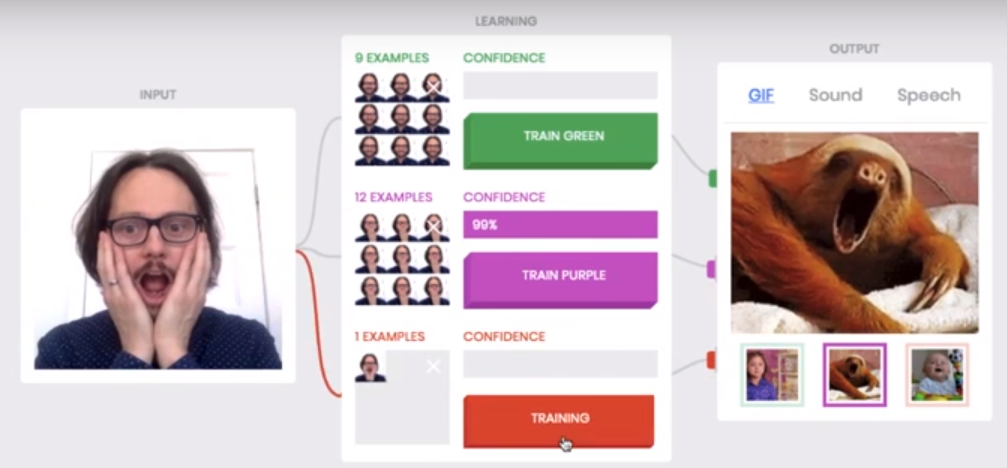